In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
# importing Data

matches_df = pd.read_csv(r'C:\Users\parc\Desktop\Data Analyst\IPL data\matches.csv')

deliveries_df = pd.read_csv(r'C:\Users\parc\Desktop\Data Analyst\IPL data\deliveries.csv')

In [4]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

# Data Cleaning

In [6]:
matches_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [7]:
matches_df.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [8]:
# Replacing values in matches_df 

matches_df.city.replace({'Bengaluru':'Bangalore','Dubai International Cricket Stadium':'Dubai',
                        'Sharjah Cricket Stadium':'Sharjah'},inplace=True)
matches_df.venue.replace({'M Chinnaswamy Stadium':'M.Chinnaswamy Stadium',
                         'Punjab Cricket Association IS Bindra Stadium':'Punjab Cricket Association Stadium, Mohali'},inplace=True)
matches_df.team1.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches_df.team2.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches_df.toss_winner.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches_df.winner.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)


In [9]:
# replacing  null values in matches_df
matches_df['city'].fillna(matches_df['venue'],inplace=True)

matches_df['result_margin'].fillna('tie',inplace= True)


In [10]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [11]:
# Replacing Values in deliveries_df

deliveries_df.batting_team.replace({'Rising Pune Supergiants:Rising Pune Supergiant'},inplace=True)
deliveries_df.bowling_team.replace({'Rising Pune Supergiants:Rising Pune Supergiant'},inplace=True)

# Total no of matches played till 2020 ( 2018 -2020)

In [12]:
import  datetime

In [13]:
matches_df['season']=pd.DatetimeIndex(matches_df['date']).year

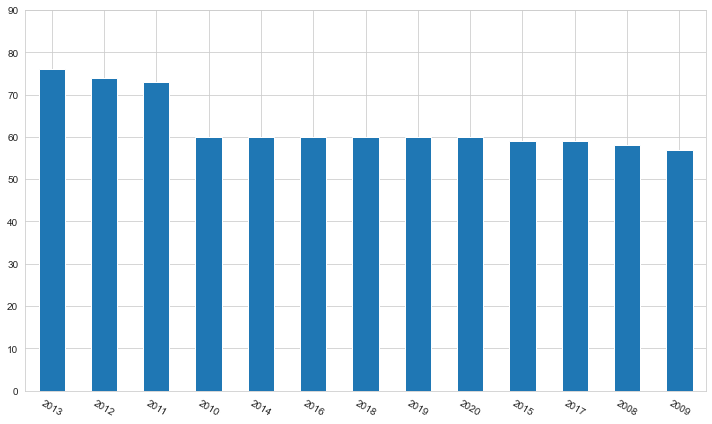

In [14]:
matches_df['season'].value_counts().plot(kind='bar',figsize=(10, 6),rot=-30,ylim=(0,90))
plt.tight_layout()

# No of teams  Played Each year( 2008 -2020)


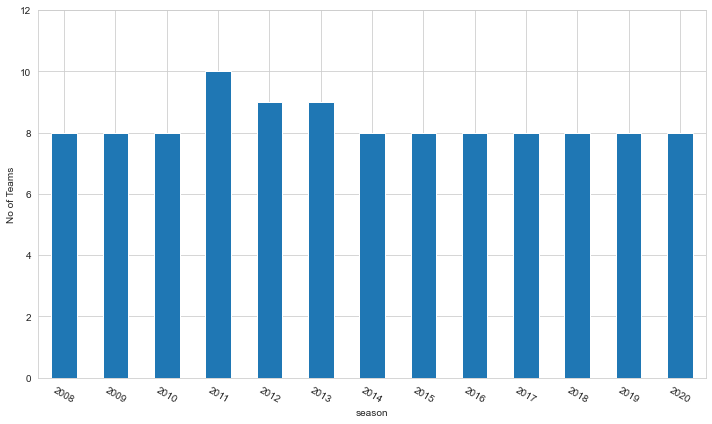

In [15]:
num_team=pd.pivot_table(matches_df,index=['season'],values ='toss_winner',aggfunc=pd.Series.nunique)
num_team.plot(kind='bar',legend=False,figsize=(10,6),ylabel='No of Teams',ylim= (0,12),rot= -30)
plt.tight_layout()


# No of  Matches win  by each team

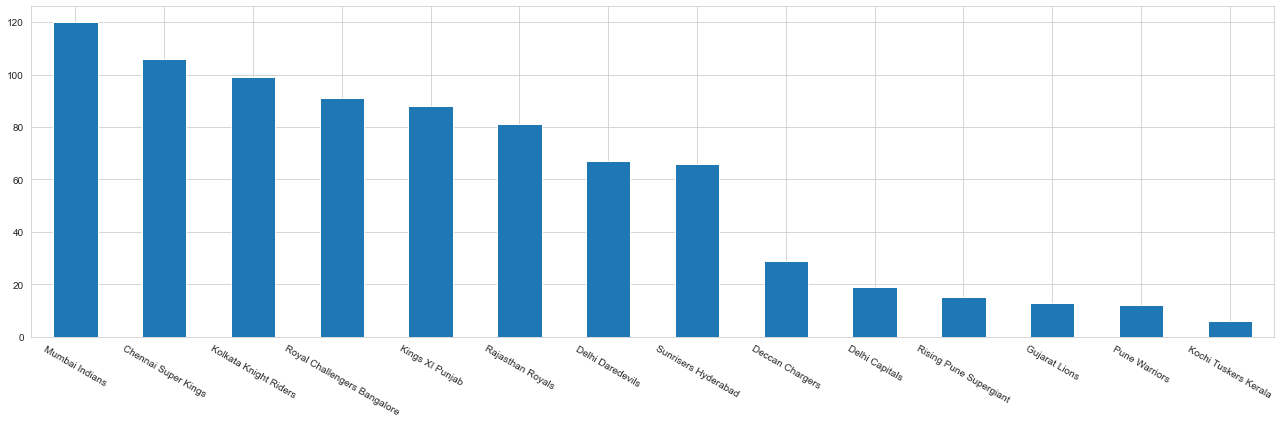

In [16]:
matches_df['winner'].value_counts().plot(kind='bar',figsize=(18, 6),rot=-30)
plt.tight_layout()


# Does toss winning  results in  winning  match?

In [17]:
matches_df['toss_win_match_win'] = np.where((matches_df.toss_winner == matches_df.winner),'Yes','NO')

matches_df.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,toss_win_match_win
0,335982,Bangalore,4/18/2008,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,NO
1,335983,Chandigarh,4/19/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,Yes
2,335984,Delhi,4/19/2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,NO
3,335985,Mumbai,4/20/2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,NO
4,335986,Kolkata,4/20/2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,NO


Text(0, 0.5, '')

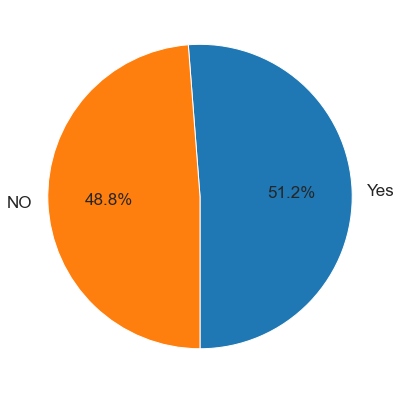

In [18]:
matches_df['toss_win_match_win'].value_counts().plot(kind='pie',figsize=(20,7),autopct='%1.1f%%',fontsize=17,startangle=270)
plt.ylabel("")

# Does the First  Batting  team have  higher chance to  win the  match

In [19]:
winning_team_batting = {'runs':'First Batting Team','wickets':'Second Batting Team'}
matches_df['winning_team'] = matches_df['result'].map(winning_team_batting)
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,toss_win_match_win,winning_team
0,335982,Bangalore,4/18/2008,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,NO,First Batting Team
1,335983,Chandigarh,4/19/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,Yes,First Batting Team
2,335984,Delhi,4/19/2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,NO,Second Batting Team
3,335985,Mumbai,4/20/2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,NO,Second Batting Team
4,335986,Kolkata,4/20/2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,NO,Second Batting Team


<AxesSubplot:title={'center':'Match winning %'}>

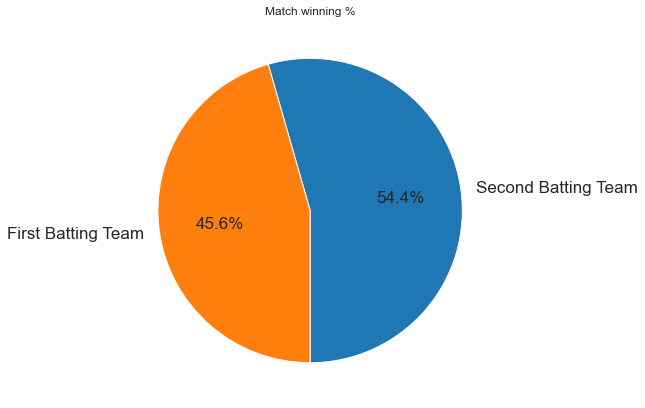

In [20]:
matches_df['winning_team'].value_counts().plot(kind='pie',figsize=(20,7),autopct='%1.1f%%',
                                               startangle=270,ylabel='', title = 'Match winning %',fontsize=17)


# Teams success rate of winnig matches

In [21]:
teams = matches_df.winner.unique()
a = pd.Series(matches_df['team1'].value_counts() + matches_df['team2'].value_counts(),name='match_played')
b = pd.Series(matches_df['winner'].value_counts(),name  = 'match_won' )

In [22]:
team_df=pd.merge(a,b,right_index = True,left_index =True)

In [23]:
team_df['winning_per'] = (team_df['match_won'] / team_df['match_played'] )*100

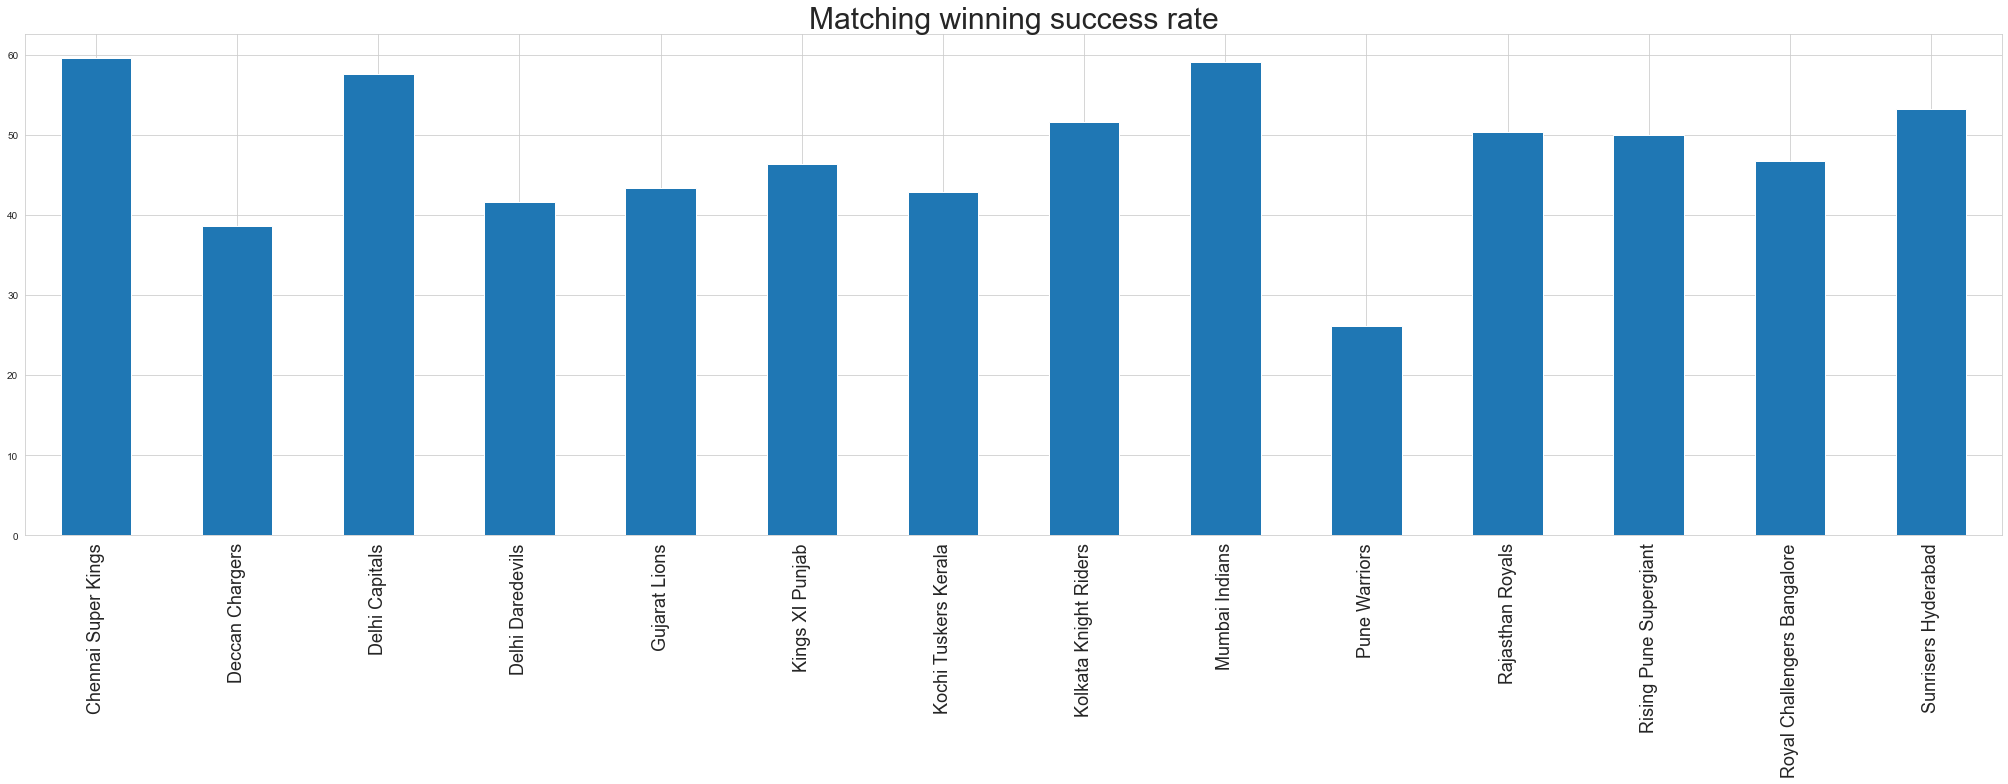

In [24]:
team_df['winning_per'].plot(kind = 'bar',figsize=(28,11))
plt.xticks(fontsize=18)
plt.title('Matching winning success rate',fontsize= 30)
plt.tight_layout()  




In [25]:
team_df

,match_played,match_won,winning_per
Chennai Super Kings,178,106,59.550562
Deccan Chargers,75,29,38.666667
Delhi Capitals,33,19,57.575758
Delhi Daredevils,161,67,41.614907
Gujarat Lions,30,13,43.333333
Kings XI Punjab,190,88,46.315789
Kochi Tuskers Kerala,14,6,42.857143
Kolkata Knight Riders,192,99,51.562500
Mumbai Indians,203,120,59.113300
Pune Warriors,46,12,26.086957


# Venue  is  in favor  for First Batting or Second  Batting

C:\Users\parc\AnacondaPython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of Matches won in each Venue')

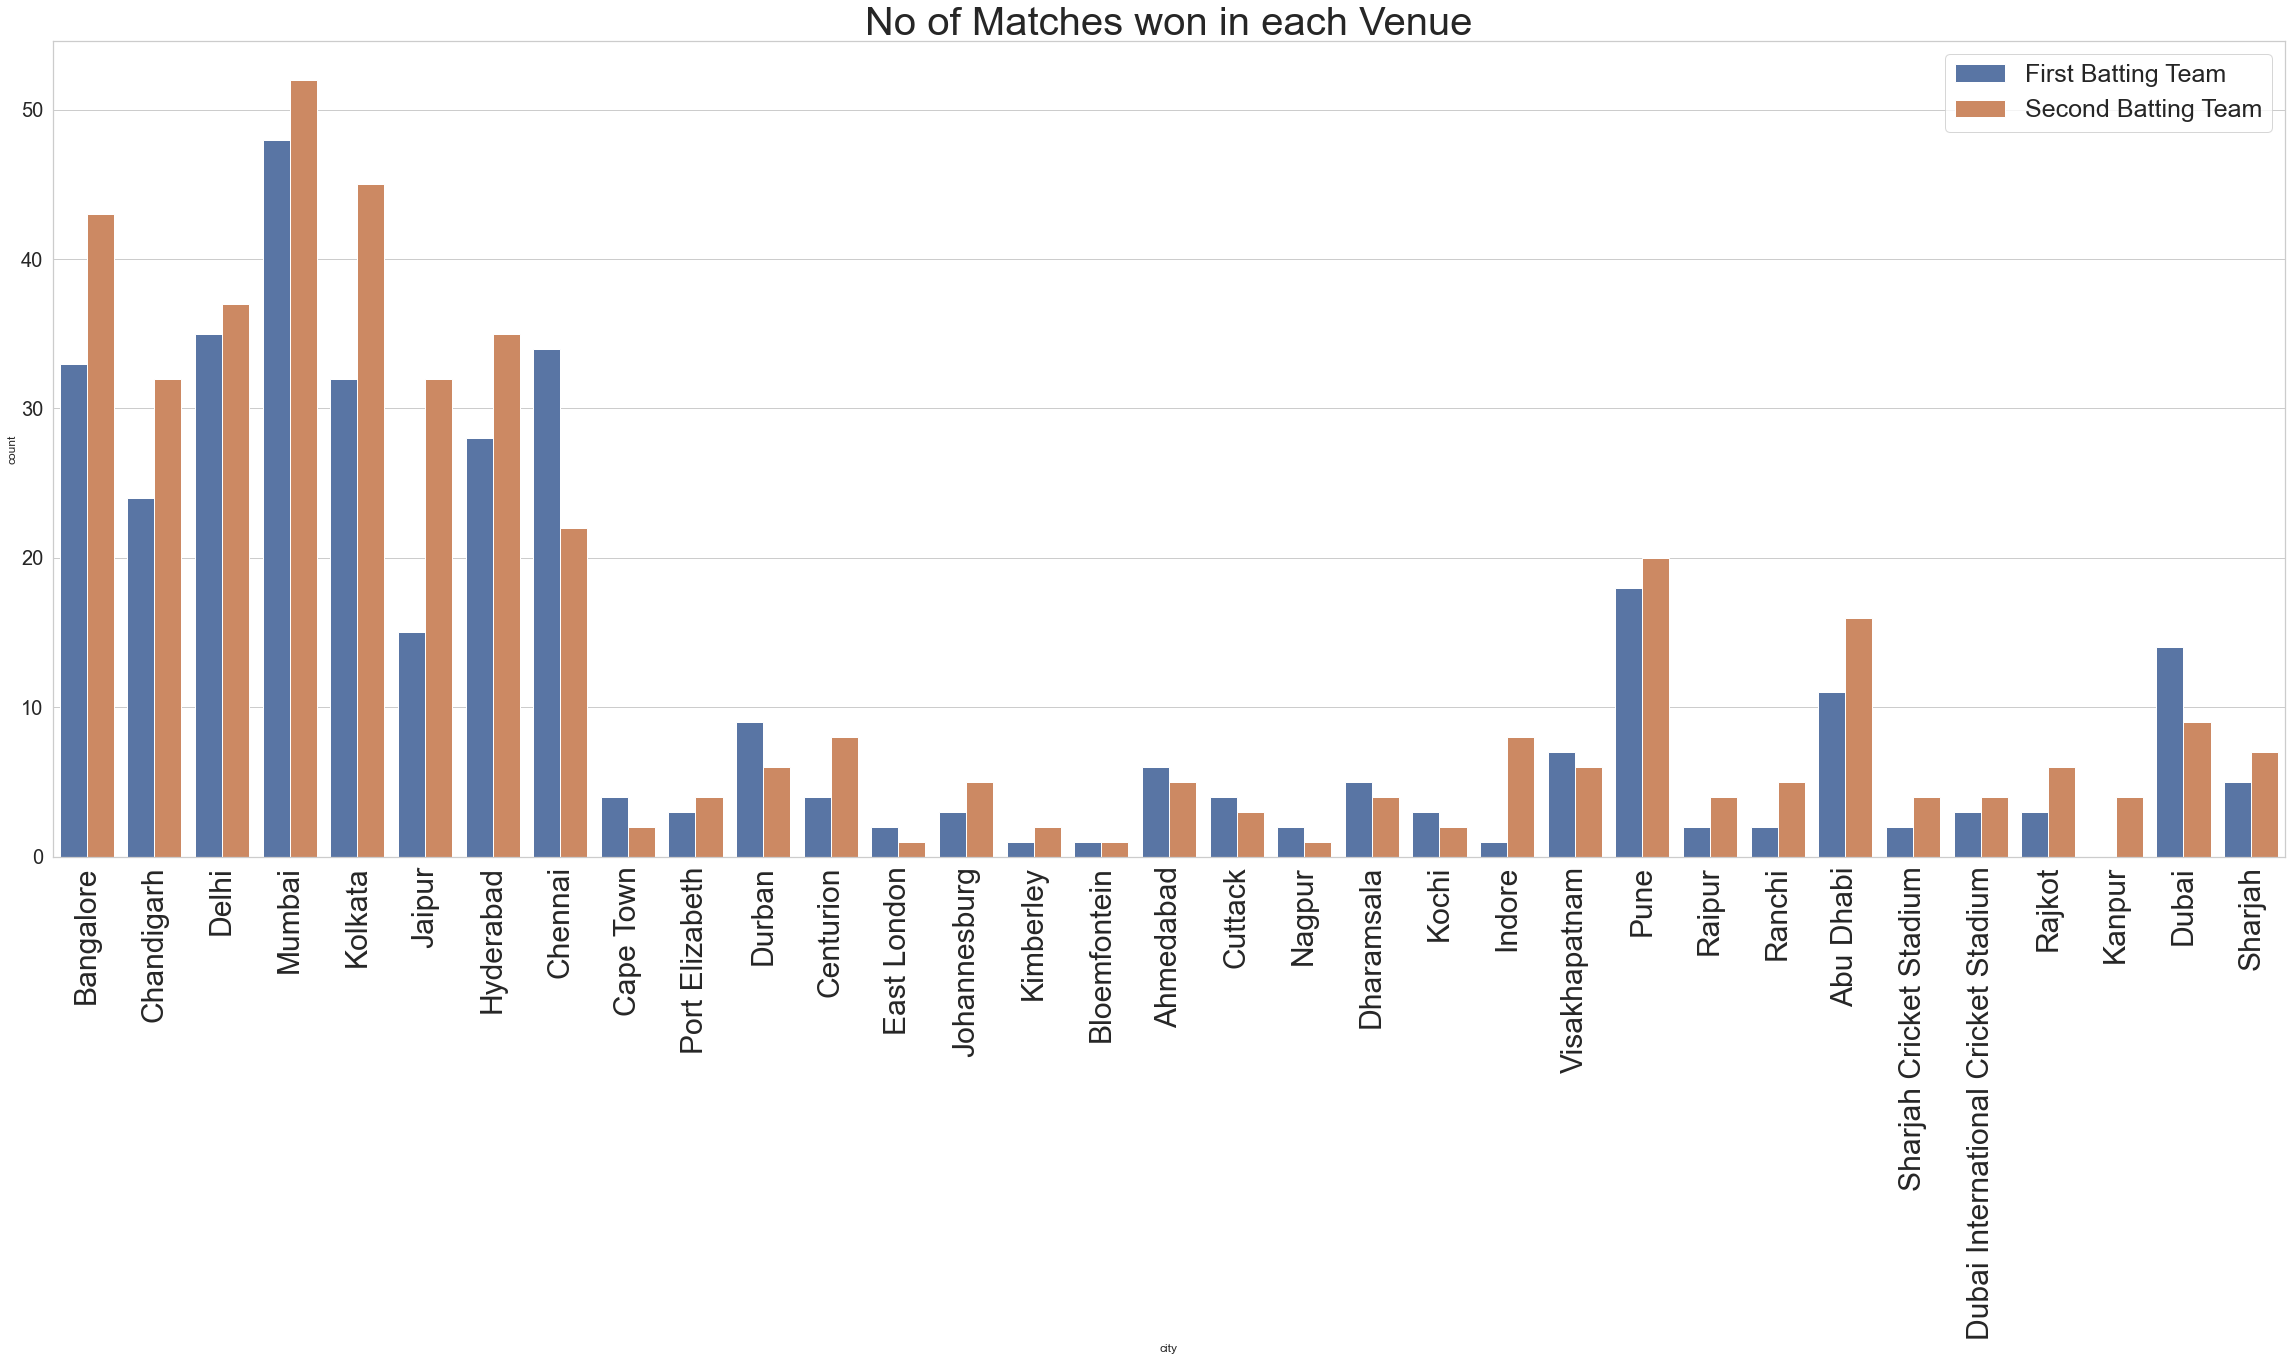

In [26]:
sns.set(rc={'figure.figsize':(40, 15)})
sns.set_style('whitegrid')
sns.countplot('city',data= matches_df, hue='winning_team')
plt.legend(fontsize = 25,loc = 'upper right')
plt.xticks(rotation = 'vertical' , fontsize = 30)
plt.yticks(fontsize = 20)
plt.title('No of Matches won in each Venue',fontsize = 40)

we can see chennai stadium  is more  favorable for first batting  team and Jaipur Stadium is  more favorable for
second batting team. Rest of the  stadium seems  to be neutral.


# Teams no of wins by putting score on board or by chasing the score..

C:\Users\parc\AnacondaPython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 70.0)

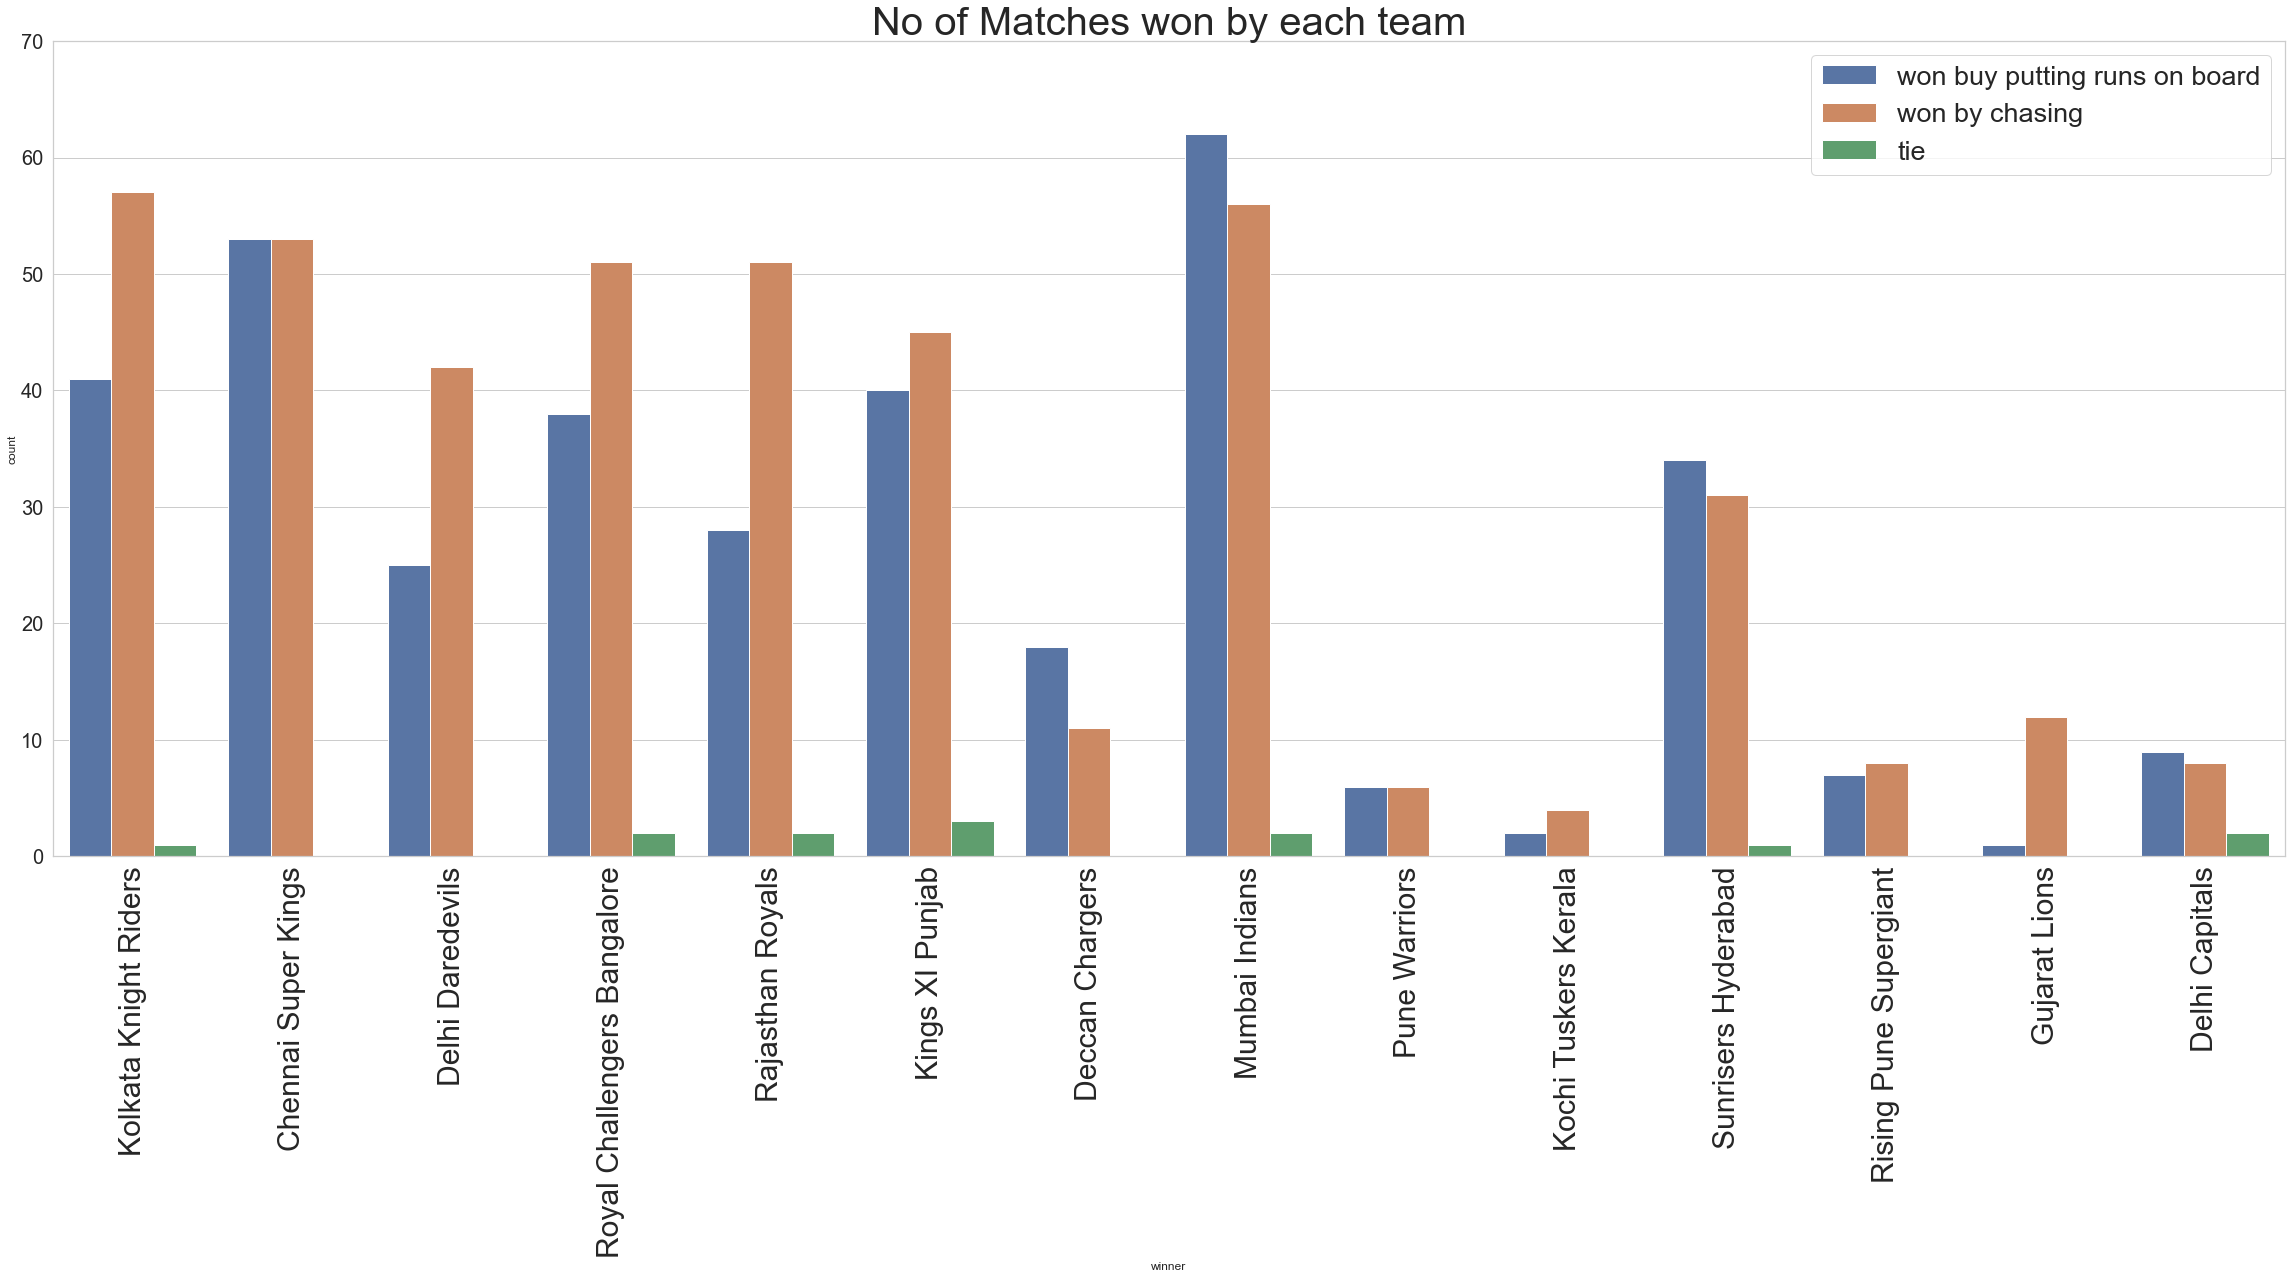

In [27]:
sns.set(rc={'figure.figsize':(40, 15)})
sns.set_style('whitegrid')
sns.countplot('winner',data= matches_df, hue='result')
plt.legend(['won buy putting runs on board','won by chasing','tie','No result'],prop={'size':27})
plt.xticks(rotation = 'vertical' , fontsize = 30)
plt.yticks(fontsize = 20)
plt.title('No of Matches won by each team',fontsize = 40)
plt.ylim([0,70])

# Teams which won the title

In [28]:
title_winner  = matches_df.groupby('season')['season','winner'].tail(1)


<ipython-input-28-9d18db2efe06>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  title_winner  = matches_df.groupby('season')['season','winner'].tail(1)


In [29]:
title_winner

,season,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


(0.0, 6.0)

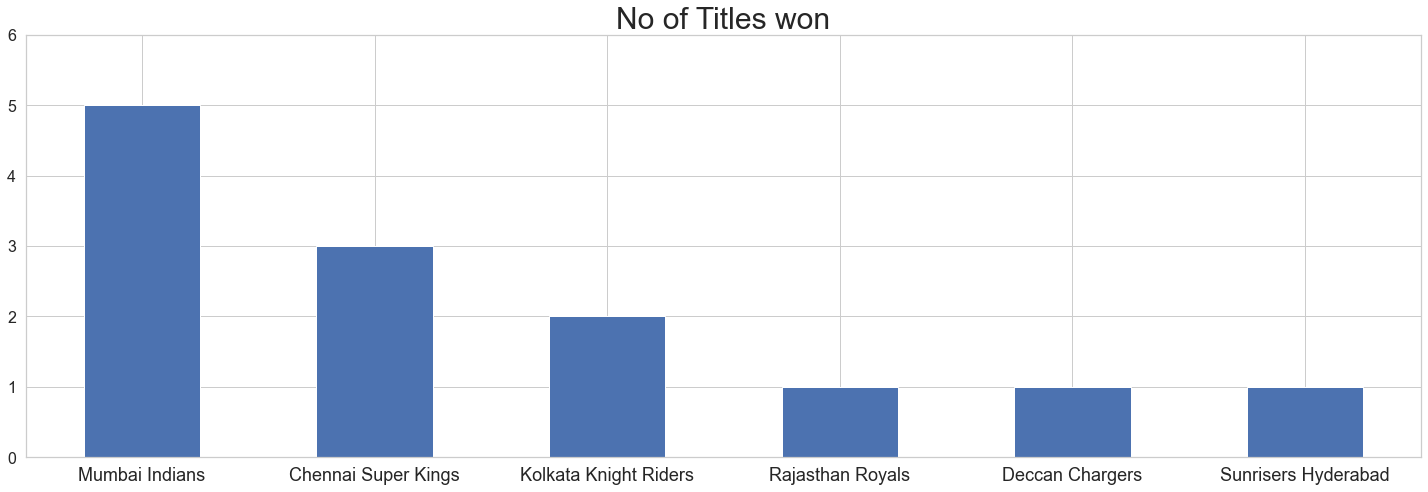

In [30]:
title_winner['winner'].value_counts().plot(kind = 'bar',figsize=(20,7))
plt.xticks(rotation = 'horizontal' , fontsize = 18)
plt.yticks(fontsize = 16)
plt.title('No of Titles won',fontsize = 30)
plt.tight_layout()
plt.ylim([0,6])

# Top 10  Batsman 

In [31]:
top_batsman = deliveries_df.groupby('batsman')['batsman','batsman_runs'].sum().sort_values('batsman_runs', ascending = False).head(10)

<ipython-input-31-77857479bc11>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_batsman = deliveries_df.groupby('batsman')['batsman','batsman_runs'].sum().sort_values('batsman_runs', ascending = False).head(10)


Text(0.5, 1.0, 'Total Runs Scored')

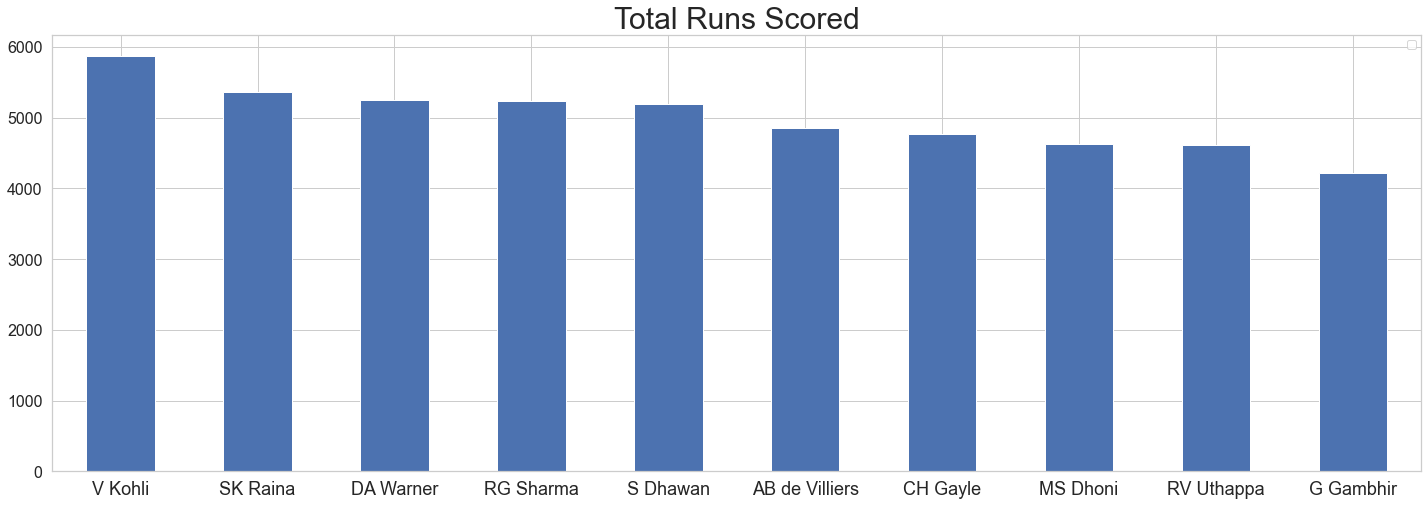

In [32]:
top_batsman.plot(kind = 'bar',figsize=(20,7))
plt.xticks(rotation = 'horizontal' , fontsize = 18)
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.legend('')
plt.xlabel('')
plt.title('Total Runs Scored', fontsize = 30)


# top  10 Bowlers

In [33]:
top_bowler = deliveries_df.groupby('bowler')['bowler','is_wicket'].sum().sort_values('is_wicket',ascending = False).head(10)

<ipython-input-33-c6b3031eef29>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_bowler = deliveries_df.groupby('bowler')['bowler','is_wicket'].sum().sort_values('is_wicket',ascending = False).head(10)


(100.0, 200.0)

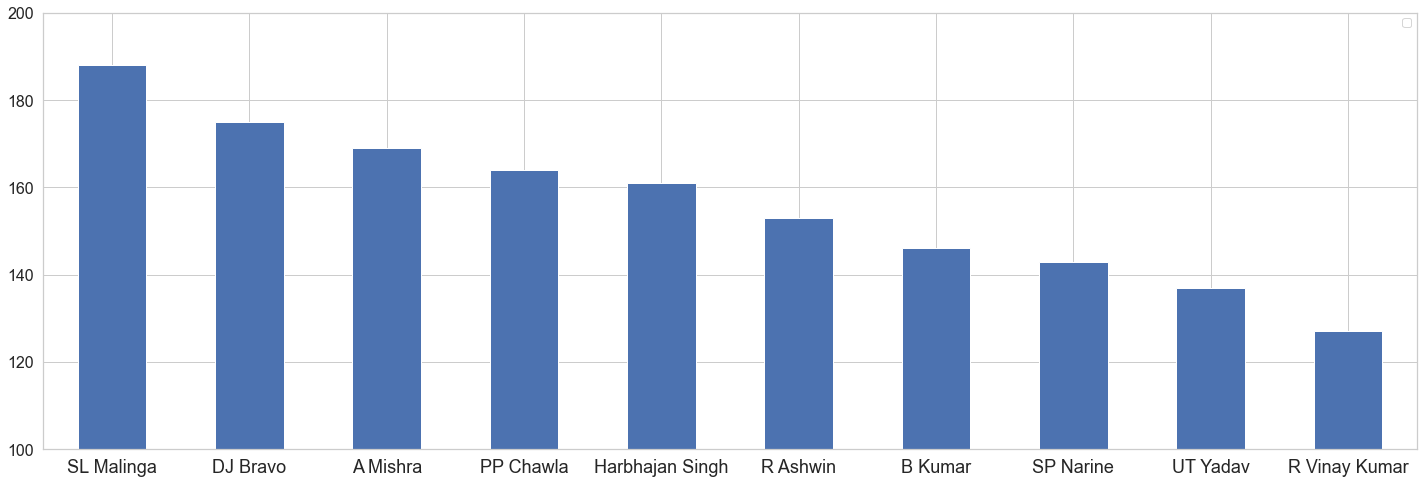

In [34]:
top_bowler.plot(kind ='bar',figsize  =  (20,7))
plt.xticks(rotation = 'horizontal' , fontsize = 18)
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.legend('')
plt.xlabel('')
plt.ylim([100,200])

# Top 10 Batsmans with highest Average

In [35]:
batsman_avg= deliveries_df.groupby('batsman')['batsman','batsman_runs'].sum()
batsman_avg['no_ball']=deliveries_df.groupby('batsman')['batsman','ball'].size()
batsman_avg['avg']=  (batsman_avg['batsman_runs']/batsman_avg['no_ball'])*100
batsman_avg = batsman_avg.loc[(batsman_avg['batsman_runs'] > 1000)].sort_values('avg',ascending= False).head(10)

<ipython-input-35-682f589ec8fd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  batsman_avg= deliveries_df.groupby('batsman')['batsman','batsman_runs'].sum()
<ipython-input-35-682f589ec8fd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  batsman_avg['no_ball']=deliveries_df.groupby('batsman')['batsman','ball'].size()


Text(0.5, 1.0, 'Top 10  Bating avg of Batsman who scored more than 1000 runs ')

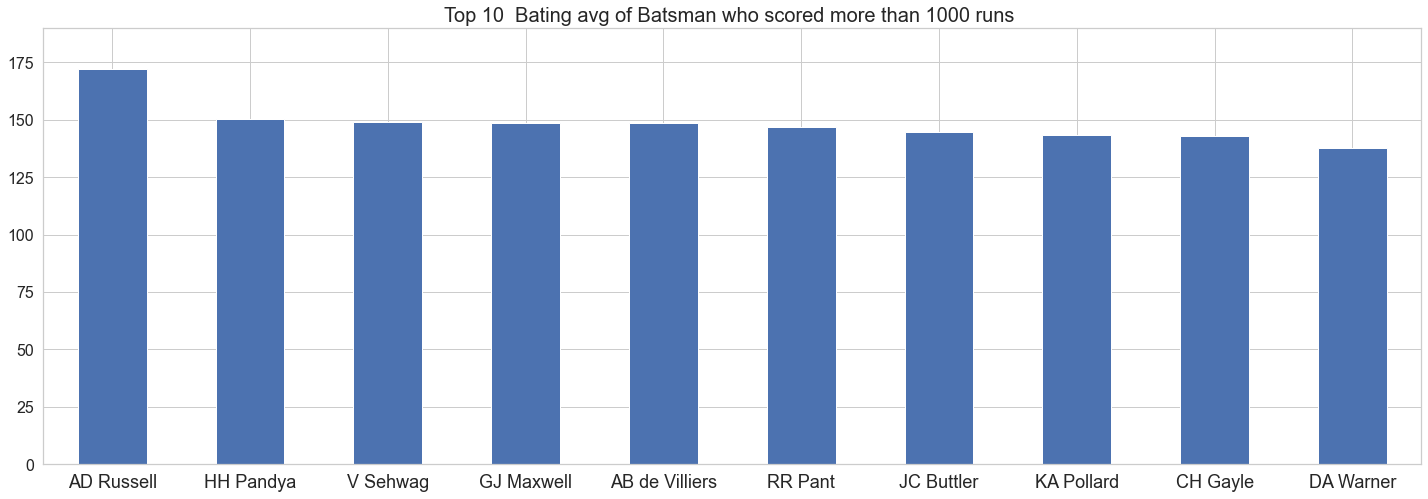

In [36]:
batsman_avg['avg'].plot(kind ='bar', figsize= (20,7))
plt.xticks(rotation = 'horizontal' , fontsize = 18)
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.xlabel('')
plt.ylim(0,190)
plt.title('Top 10  Bating avg of Batsman who scored more than 1000 runs ', fontsize= 20)

winning_team_batting = {'runs':'First Batting Team','wickets':'Second Batting Team'}
matches_df['winning_team'] = matches_df['result'].map(winning_team_batting)
matches_df.head()

batsman_avg['no_ball']=deliveries_df.groupby('batsman')['batsman','ball'].size()
top_bowler = deliveries_df.groupby('bowler')['bowler','is_wicket'].sum().sort_values('is_wicket',ascending = False).head(10)

In [37]:
team_wicket= deliveries_df[['batting_team','bowler','is_wicket']]# taking out 3  columns

In [38]:
team_wicket= team_wicket.loc[(team_wicket['is_wicket']> 0)]# filtering out  is_wicket  = 1

In [55]:
team_wicket = pd.pivot_table(team_wicket,index = ['batting_team', 'bowler'],values= 'is_wicket', aggfunc = 'sum')

In [63]:
g= team_wicket['is_wicket'].groupby('batting_team',group_keys=False)
team_max_wicket =  g.nlargest(1)

In [67]:
team_max_wicket.coulmns= ['opponent','Bowler','Wickets']

In [69]:
print(team_max_wicket)

batting_team                 bowler         
Chennai Super Kings          SL Malinga         37
Deccan Chargers              SL Malinga         20
Delhi Capitals               JJ Bumrah          12
Delhi Daredevils             R Ashwin           23
Gujarat Lions                B Kumar            12
Kings XI Punjab              SP Narine          31
Kochi Tuskers Kerala         I Sharma            5
Kolkata Knight Riders        B Kumar            28
Mumbai Indians               DJ Bravo           31
Pune Warriors                SL Malinga         12
Rajasthan Royals             A Mishra           33
Rising Pune Supergiant       AJ Tye              5
Rising Pune Supergiants      A Nehra             6
Royal Challengers Bangalore  Harbhajan Singh    25
Sunrisers Hyderabad          DJ Bravo           19
Name: is_wicket, dtype: int64
